## Trabalho extra -  Unidade 1 

- **Aluno :**: Gabriel Queiroz de Almeida Pereira
- **Matrícula: **: 20150128108
- **Professor: **: Ivanovitch


## 1.1 Introdução

Esse documento tem como base de dados 2025 sorteios da Mega Sena e demonstra os detalhes a cerca dos sorteios, como por exemplo: nº de ganhadores, prêmios acumulados, as 6 dezenas sorteiadas daquela edição, etc. E, ao decorrer dele, faremos uma análise sobre diversos dados contido nele.


A base de dados está em formato de planilha em excel. Para carregar esse arquivo em formato de dataframe utilizarames o código abaixo:

>```python
# Importa as bibliotecas necessárias
import pandas as pd
# Atribue o nome da planilha para a variável "arquivo"
arquivo = 'basedados.xlsx'
# Carrega a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)
# Imprime o nome das planilhas
print(excel.sheet_names)
# Carrega a planilha excel para um objeto dataframe
dados = excel.parse(0)
# Imprime as cinco primeiras linhas do dataframe
dados.head()
```

In [21]:
import pandas as pd
arquivo = 'basedados.xlsx'
excel = pd.ExcelFile(arquivo)
print(excel.sheet_names)
dados = excel.parse(0)
dados.head()

['MegaSena']


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


# 1.2 Curiosidades usando o Pandas

Como todo jogo de sorte, há sempre aquelas curiosidades a cerca de seus resultados. Como, por exemplo, quais foram os números mais sorteados? Qual foi o maior valor já sorteado? Entre outras. 

Logo, utilizaremos algumas ferramentas do *Pandas* pra trazer 3 curiosidades as quais achamos ser interessante e, juntamente, explicaremos como ela foi desenvolvida.

### 1.2.1 Qual foi o maior valor já sorteado?

O maior valor de um sorteio da Mega-Sena é quando se acerta as 6 unidades. Logo, sua forma de calculo é a seguinte: 

$$Prêmio = Ganhadores\_Sena	\times Rateio\_Sena$$

Para isso criaremos uma nova coluna para os prêmios, chamada [Premio].

In [24]:
dados["Premio"] = dados["Ganhadores_Sena"] * dados["Rateio_Sena"]

Logo, para acharmos o maior prêmio basta utilizarmos a função *max()*, que achará o maior valor de toda a coluna.

In [52]:
dados["Premio"].max()

306718743.68

Isso mesmo, R$306.718.743.68 foi o maior prêmio já realizado desde março de 1996.
O concurso foi o número 2000, a Mega dá virada deste ano (2018), para localizá-lo basta-nos utilizarmos desse método: 

In [44]:
dados[dados["Premio"] == dados["Premio"].max()]


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Premio
1999,2000,2017-12-31,6,37,34,10,3,17,890947368.5,17,18042279.04,4862,10565.03,173428,423.12,NÃO,0.0,2000000,3.067187e+08


Para localizar, em ambos os casos, foi bem fácil. No primeiro caso nós utilizamos o método *max()*, ele encontra o maior valor daquela coluna, de todas as linhas da planilha. 

Já no segundo caso, nós simplesmente procuramos o item entre os dados, em que, o seu valor de ["Premio"] seja igual ao máximo. Logo, ele retornará a linha que conterá o maior valor de prêmio, que é o concurso **2000**.

### 1.2.2 Quais foram as dezenas mais sorteada?



In [22]:
colunas = ["Dezena1", "Dezena2", "Dezena3", "Dezena4", "Dezena5", "Dezena6"]

dados[dados["Data Sorteio"] > "1996-01-01"][colunas].unstack().value_counts()[0:6]

5     233
53    230
10    227
23    224
4     224
54    221
dtype: int64

As dezenas 02, 05, 10, 30, 52, 52 são as 6 dezenas mais sorteadas até hoje. 

Para acha-las fazemos assim:
Primeiramente criamos um vetor com as colunas das dezenas. 

**Explicação da função....**


Depois, chamamos a função *value_counts()*, que irá retornar em ordem crescente as dezenas e os números de vezes em que elas aparecem na tabela de dados. E, por fim que, selecionamos o *[0:6]*, que retornará somente os 6 primeiros itens.

### 1.2.3 Qual foi o sorteiro com mais vencedores?

Você acertar 6 dezenas deve ser uma baita sorte, mas ter que dividir com vários vencedores? Shii... Essa com certeza deve ser a parte mais difícil. Mas, vamos lá, qual foi o sorteio em que mais se foi dividido o prêmio? Vamos achá-lo, é bem simples.



In [50]:
dados[dados["Ganhadores_Sena"] == dados["Ganhadores_Sena"].max()]

,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Premio
1999,2000,2017-12-31,6,37,34,10,3,17,890947368.5,17,18042279.04,4862,10565.03,173428,423.12,NÃO,0.0,2000000,3.067187e+08


Realizamos o mesmo procedimento do processo anterior, entretanto, com uma coluna diferente.
E, para nossa surpresa, foi o mesmo concurso em que teve o maior prêmio dos últimos anos, o concurso ***2000***.
Entretanto, como mostra o rateio, cada um ganhou ***R$180.042.279,04*** 

É... não deve ter sido tão difícil dividir um prêmio tão alto, rs.

# 1.3 Análise gráfica básica dos valores sorteados

Utilizando a biblioteca [matplotlib](http://matplotlib.org/), faremos uma análise gráfica dos aumentos e declíneos dos valores já sorteados, levando em conta todos os anos do sorteiro. 
Essa biblioteca nos permite criar e customizar um gráfico usando a base de dados.

O módulo geralmente é importado como *plt*:

>```python
import matplotlib.pyplot as plt
```

Ele contém duas funções: 

>```python
plt.plot()
plt.show()
```

A *plt.plot()* gera o gráfico e a *plt.show()* imprime-o.

<br>
<div class="alert alert-info">
<b>Gráfico 1</b>
</div>

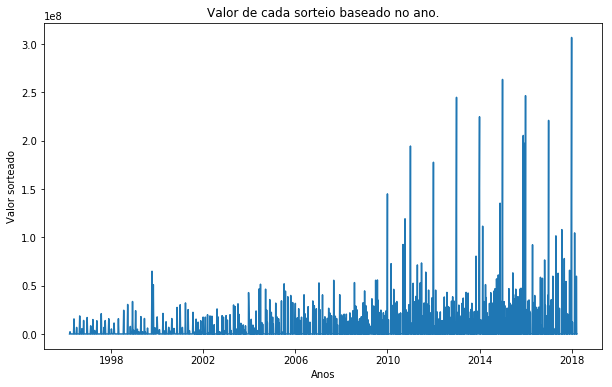

In [25]:
#Importaremos a biblioteca e geraremos o gráfico vázio.
import matplotlib.pyplot as plt


#Aumentamos o tamanho da figura
plt.figure(figsize=(10,6))
#Utilizaremos os prêmios como eixo Y e os anos como eixo X.
plt.plot( dados["Data Sorteio"], dados["Premio"])
#Eixo X seŕa nomeado com "Anos".
plt.xlabel("Anos")
#Eixo Y será nomeado com "Valor sorteado".
plt.ylabel("Valor sorteado")
#O gráfico terá o título de "Valor de cada sorteio baseado no ano."
plt.title("Valor de cada sorteio baseado no ano.")
#E, por fim, utilizamos a função que imprime o gráfico.
plt.show()

É surpreendente a diferença a alta dos valores nos últimos 10 anos. Como, de 2010 para 2018 houveram índices bem maiores que de 1998 à 2010. Além disso, é importante não ver somente os picos mas as médias durante o ano, como são maiores.

Entretanto, não é bem justo se comparar somente com valores duas épocas em que o poder de consumo são bem diferentes, é importante também comparar o poder de consumo do brasileiro nesses dois tempos.
Logo, separei alguns dados importantes para se comparar.

Salário Mínimo 2002: R$200,00.

Salário Mínimo 2015: R$788,00

Gasolina 2002: R$1,76.

Gasolina 2015: R$3,26.

Dólar 2002: R$ 2,60. 

Dólar 2015: R$ 4,00.

Salário de deputados 2002: R$ 8.000,00

Salário de deputados 2015: R$ 33.700,00

## 1.3 Análise baseada nos 4 últimos governos

A crise política brasileira vem afetando diversos pilares, um dos principais é a economia. Com a economia desrregulada, todos os pilares da sociedade são alterados, inclusive os jogos de sorte. Logo, visto que o sorteio da MegaSena é realizado pelo governo federal, resolvemos fazer uma análise relacionando um ao outros, as apostas, os valores e o governo atual daquele ano. 

Valendo ressaltar que nos últimos anos, passamos por 4 presidentes. O FHC, o Lula, a Dilma e o Michel Temer, e ambos se utilizaram de estratégias econômicas diferentes. Logo, faremos uma análise com parte do governo dos quatro.

** É importante ressaltar que nem todos os governos estão completos. O governo do FHC começou em 1995, entretanto, nós só temos os dados a partir de 1996. E o governo de Michel Temer foi levado em conta que começou em 2016, mesmo o mandato só tenha sido iniciado em agosto.**

Com isso, trabalharemos com as funções *subplots()*. Essa função nos ajudará a criar diversos gráficos, podendo ser um ao lado ou abaixo do outro. Ela é mais uma das funções da biblioteca *matplotlib.pyplot*.

<br>
<div class="alert alert-info">
<b>Gráfico 2</b>
</div>

(0, 306718743.68)

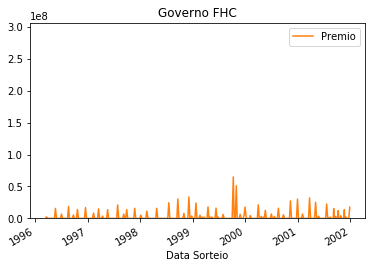

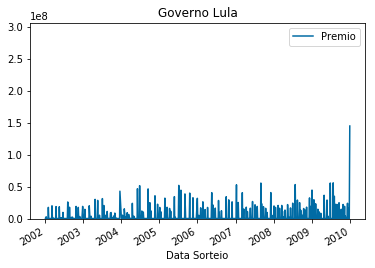

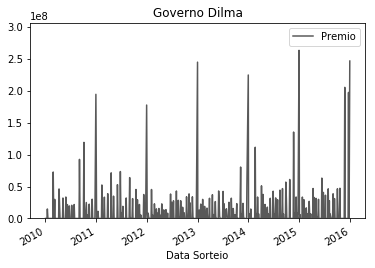

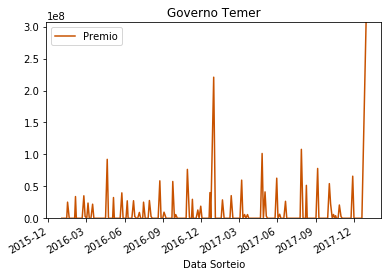

In [94]:
#PROCURAR METODO PARA POR O EIXO Y IGUAL EM TODOS SUBPLOTS.

governoFH = dados[dados["Data Sorteio"].dt.year == 1996]
for i in range(1996, 2002):
    a = dados[dados["Data Sorteio"].dt.year == i]
    governoFH = pd.concat([governoFH, a])


governoLu = dados[dados["Data Sorteio"].dt.year == 2002]

for i in range(2003, 2010):
    a = dados[dados["Data Sorteio"].dt.year == i]
    governoLu =  pd.concat([governoLu, a])

governoDi = dados[dados["Data Sorteio"].dt.year == 2010]
    
for j in range(2011, 2016):
    b = dados[dados["Data Sorteio"].dt.year == j]
    governoDi = pd.concat([governoDi, b])

governoTem = dados[dados["Data Sorteio"].dt.year == 2016]
    
for k in range(2017, 2018):
    c = dados[dados["Data Sorteio"].dt.year == k]
    governoTem = pd.concat([governoTem, c])

fig = plt.figure(figsize=(30,30))

  
ax1 = governoFH.plot(kind="line", x="Data Sorteio", y="Premio", c=(255/255,128/255,14/255), title="Governo FHC")
ax2 = governoLu.plot(kind="line", x="Data Sorteio", y="Premio", c=(0/255, 107/255, 164/255), title="Governo Lula")
ax3 = governoDi.plot(kind="line", x="Data Sorteio", y="Premio", c=(89/255, 89/255, 89/255), title="Governo Dilma" )
ax4 = governoTem.plot(kind="line",x='Data Sorteio', y="Premio", c=(200/255, 82/255, 0/255), title="Governo Temer")
Limite = dados["Premio"].max()
ax1.set_ylim(0,Limite)
ax2.set_ylim(0,Limite)
ax3.set_ylim(0,Limite)
ax4.set_ylim(0,Limite)

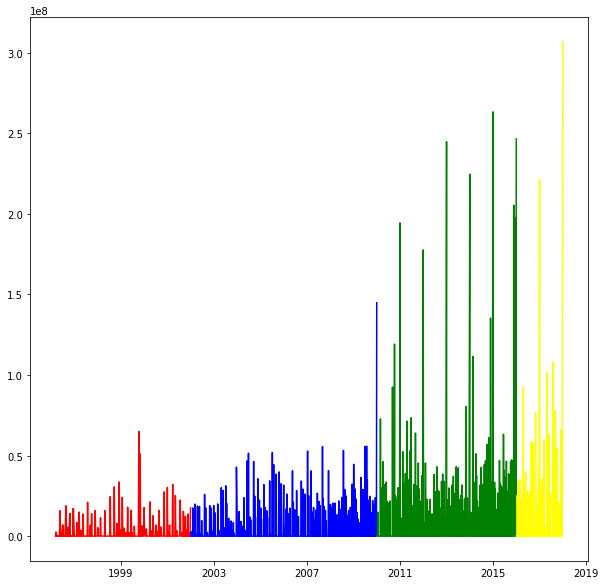

In [66]:
# Ou então, podemos fazer um gráfico só com cada governo.
fig = plt.figure(figsize=(10,10))

plt.plot(governoFH["Data Sorteio"], governoFH["Premio"], c="red")
plt.plot(governoLu["Data Sorteio"], governoLu["Premio"], c="blue")
plt.plot(governoDi["Data Sorteio"], governoDi["Premio"], c="green")
plt.plot(governoTem["Data Sorteio"], governoTem["Premio"], c="yellow")

### Valor médio por ano de cada governo.

Aqui analisaremos a média prêmio médio por concurso, de cada governo e, logo em seguida, a média de ganhador de cada concurso (Quadra, Quina e Sena). Visto que, prêmios altos pode ser significado  simplesmente de que ele foi acumulado. Logo, é mais justo ver a média pro 

In [97]:
#Calcula a média de prêmio do governo FHC.
mediaFH = sum(governoFH["Premio"])/ governoFH["Premio"].size
#Imprime a média, passando-a para String.
print("Media do governo de FHC: " + str(mediaFH))

#Os 3 métodos abaixo seguem a mesma lógica, ele 
MediaQuadra1 = sum(governoFH["Rateio_Quadra"]) / sum(governoFH["Ganhadores_Quadra"])
print("Media Ganhadores da Quadra no Governo FHC: " + str(MediaQuadra))

MediaQuina1 = sum(governoFH["Rateio_Quina"]) / sum(governoFH["Ganhadores_Quina"])
print("Media Ganhadores da Quina no Governo FHC: " + str(MediaQuina))

MediaSena1 = sum(governoFH["Rateio_Sena"]) / sum(governoFH["Ganhadores_Sena"])
print("Media Ganhadores da Sena no Governo FHC: " + str(MediaSena))
print("\n")


#Calcula a média de prêmio do governo Lula.
mediaLU = sum(governoLu["Premio"])/ governoLu["Premio"].size
#Imprime a média, passando-a para String.
print("Media do governo de Lula: " + str(mediaLU))

MediaQuadra2 = sum(governoLu["Rateio_Quadra"]) / sum(governoLu["Ganhadores_Quadra"])
print("Media Ganhadores da Quadra no Governo Lula: " + str(MediaQuadra2))

MediaQuina2 = sum(governoLu["Rateio_Quina"]) / sum(governoLu["Ganhadores_Quina"])
print("Media Ganhadores da Quina no Governo Lula: " + str(MediaQuina2))

MediaSena2 = sum(governoLu["Rateio_Sena"]) / sum(governoLu["Ganhadores_Sena"])
print("Media Ganhadores da Sena no Governo Lula: " + str(MediaSena2))
print("\n")


#Calcula a média de prêmio do governo Dilma.
mediaDi = sum(governoDi["Premio"])/ governoDi["Premio"].size
#Imprime a média, passando-a para String.
print("Media do governo de Dilma: " + str(mediaDi))

MediaQuadra3 = sum(governoDi["Rateio_Quadra"]) / sum(governoDi["Ganhadores_Quadra"])
print("Media Ganhadores da Quadra no Governo Dilma: " + str(MediaQuadra3))

MediaQuina3 = sum(governoDi["Rateio_Quina"]) / sum(governoDi["Ganhadores_Quina"])
print("Media Ganhadores da Quina no Governo Dilma: " + str(MediaQuina3))

MediaSena3 = sum(governoDi["Rateio_Sena"]) / sum(governoDi["Ganhadores_Sena"])
print("Media Ganhadores da Sena no Governo Dilma: " + str(MediaSena3))
print("\n")


#Calcula a média de prêmio do governo Temer.
mediaTe = sum(governoTem["Premio"])/governoTem["Premio"].size
#Imprime a média, passando-a para String.
print("Media do governo de Temer: " + str(mediaTe))

MediaQuadra4 = sum(governoTem["Rateio_Quadra"]) / sum(governoTem["Ganhadores_Quadra"])
print("Media Ganhadores da Quadra no Governo Temer: " + str(MediaQuadra4))

MediaQuina4 = sum(governoTem["Rateio_Quina"]) / sum(governoTem["Ganhadores_Quina"])
print("Media Ganhadores da Quina no Governo Temer: " + str(MediaQuina4))

MediaSena4 = sum(governoTem["Rateio_Sena"]) / sum(governoTem["Ganhadores_Sena"])
print("Media Ganhadores da Sena no Governo Temer: " + str(MediaSena4))
print("\n")

Media do governo de FHC: 2666358.6673412705
Media Ganhadores da Quadra no Governo FHC: 0.025964599370115665
Media Ganhadores da Quina no Governo FHC: 137.9052187200171
Media Ganhadores da Sena no Governo FHC: 7656523.123333335


Media do governo de Lula: 3736128.5233742343
Media Ganhadores da Quadra no Governo Lula: 0.04042299337117383
Media Ganhadores da Quina no Governo Lula: 192.88361936948823
Media Ganhadores da Sena no Governo Lula: 10000929.640769236


Media do governo de Dilma: 9402684.879559062
Media Ganhadores da Quadra no Governo Dilma: 0.05246010503851507
Media Ganhadores da Quina no Governo Dilma: 180.1674389750506
Media Ganhadores da Sena no Governo Dilma: 15442938.258816797


Media do governo de Temer: 8940985.11836
Media Ganhadores da Quadra no Governo Temer: 0.11609047595464582
Media Ganhadores da Quina no Governo Temer: 373.99258034610625
Media Ganhadores da Sena no Governo Temer: 17606391.24448276


